In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from pathlib import Path
# from tqdm.notebook import tqdm
from imageio import imread

import seaborn as sns


In [5]:
def read_grayscale_pngs(path, width=20, height=13):
    path = Path(path)
    if not path.exists():
        print("Path {} doesn't exist".format(path))
        return None

    # print(len([name for name in os.listdir('{}/.'.format(path)) if os.path.isfile(name)]))
    num_files = len(list(path.glob('**/*.png'))) # Calculate amount of files in directory
    # num_files = len([f for f in path.iterdir() if path.joinpath(f).is_file()]) # Calculate amount of files in directory

    images = np.empty((num_files, 13, 20))

    for i, image_path in enumerate(sorted(path.glob('**/*.png'), key=lambda f: int(f.stem))):
        images[i] = np.array(imread(image_path))[:, :, 0] # Pixel data: It's grayscale so take only Red values from [R, G, B, A]
    return images

In [6]:
legal = np.concatenate((read_grayscale_pngs("out/legal/orig"), read_grayscale_pngs("out/legal/mirrored")))
illegal = np.concatenate((read_grayscale_pngs("out/illegal/orig"), read_grayscale_pngs("out/illegal/mirrored")))

# mirrored_legal = read_grayscale_pngs("out/legal/mirrored")
# mirrored_illegal = read_grayscale_pngs("out/illegal/mirrored")  

legal_test = read_grayscale_pngs("testing_recurrent/legal")
illegal_test = read_grayscale_pngs("testing_recurrent/illegal")


In [7]:
from sklearn.model_selection import train_test_split# Spliiting data into test and train sets


X_train = np.concatenate((legal, illegal))
X_train = X_train / 255.0
Y_train = np.concatenate((np.full(len(legal), 0), np.full(len(illegal), 1)))

# X_mirror = np.concatenate((mirrored_legal, mirrored_illegal))
# X_mirror = X_mirror / 255.0
# Y_mirror = np.concatenate((np.full(len(mirrored_legal), 0), np.full(len(mirrored_illegal), 1))

X_test = np.concatenate((legal_test, illegal_test))
X_test = X_test / 255.0
Y_test = np.concatenate((np.full(len(legal_test), 0), np.full(len(illegal_test), 1)))

# X_test, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)# fitting the model

In [7]:
len(X_test)

614

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
# train_dataset = train_dataset.shuffle(buffer_size=len(X_train), reshuffle_each_iteration=True, seed=133742).batch(10)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 13, 20, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 13, 20, 1).astype('float32')

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# Convolutional
keras.backend.clear_session()
modelc = keras.Sequential()

modelc.add(layers.Reshape((13,20,1), input_shape=(13,20)))
modelc.add(layers.Conv2D(1, 2, input_shape=(13,20,1), activation="relu"))
modelc.add(layers.Flatten())
modelc.add(layers.Dense(10, activation="relu"))
modelc.add(layers.Dense(1,  activation="sigmoid"))
# model.summary()
modelc.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
modelc.save_weights("modelc.h5") # loaded_model.load_weights("model.h5")
modelc.fit(train_dataset, shuffle=False, epochs=16, validation_data=(X_val, Y_val))

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    
loss, accuracy

<AxesSubplot:>

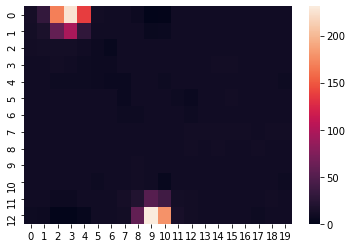

In [8]:
import seaborn as sns
sns.heatmap(legal_test[100])

<AxesSubplot:>

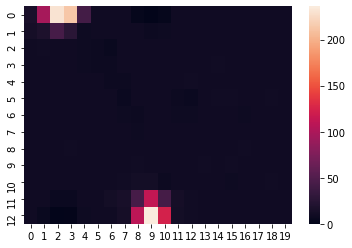

In [9]:
sns.heatmap(legal_test[101])

<AxesSubplot:>

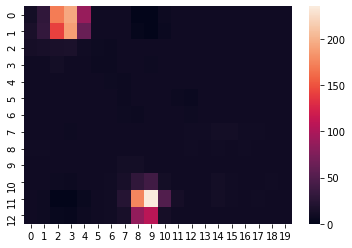

In [10]:
sns.heatmap(legal_test[102])